In [605]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [606]:
import pandas as pd
import numpy as np
df=pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#  set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [607]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [608]:
def quality_analysis(row):
    if row['quality'] < 6:
        return 1
    else:
        return 0

In [609]:
# apply to dataframe, use axis=1 to apply the function to every row
df['quality_analysis'] = df.apply(quality_analysis, axis=1)
df[['quality','quality_analysis']].head()

,quality,quality_analysis
0,5,1
1,5,1
2,5,1
3,6,0
4,5,1


In [610]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_analysis
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


# EDA

# 1.Checking number and type of columns

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_analysis      1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [612]:
len(df.columns)

13

There are 13 columns of which all are integer values

Among this the label is categorical data and hence we will be using classification model here

# 2.finding if null values are there

In [613]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_analysis        0
dtype: int64

No null values

# 3.Understanding data

In [614]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_analysis
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.465291
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


Observations:

Outliers present in total sulfur dioxide



# 4.Removing duplicate values

In [615]:
df.drop_duplicates(inplace=True)

# 5. checking for class imbalance

In [616]:
df["quality_analysis"].value_counts()

0    719
1    640
Name: quality_analysis, dtype: int64

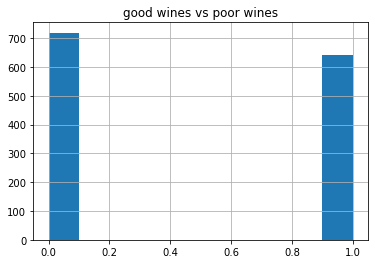

In [617]:
df["quality_analysis"].hist(grid=True)
plt.title("good wines vs poor wines")
plt.show()

class imbalance is present

# 6. vif

In [618]:
x=df.drop(columns=["quality","quality_analysis"])
y=df["quality_analysis"]

In [619]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,7.880951,fixed acidity
1,1.777884,volatile acidity
2,3.124679,citric acid
3,1.641987,residual sugar
4,1.530769,chlorides
5,1.950922,free sulfur dioxide
6,2.216688,total sulfur dioxide
7,6.281009,density
8,3.397407,pH
9,1.466779,sulphates


Above 5 vif is for fixed acidity and density , A VIF between 5 and 10 indicates high correlation/multicollinearity that may be problematic.

Hence we will drop both of them


In [620]:
df.drop(['fixed acidity','density'], axis = 1)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,quality_analysis
0,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,1
1,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,1
2,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,1
3,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,0
5,0.660,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...
1593,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5,6,0
1594,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5,5,1
1595,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2,6,0
1597,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2,5,1


Now the 2 columns which showed multicorrelinearity got removed

In [621]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_analysis
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


# 7. Check the distribution of all the features

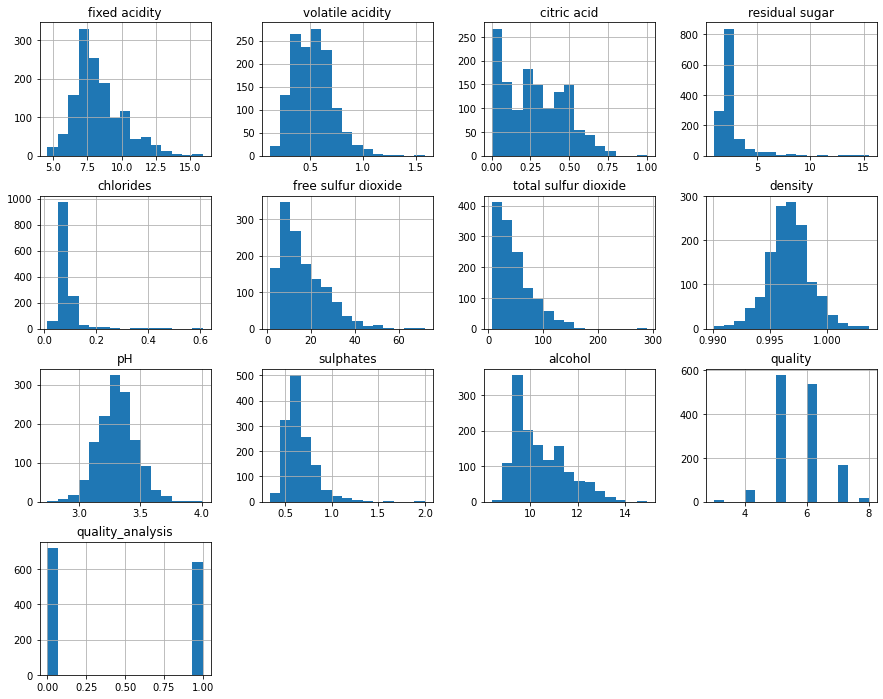

In [622]:

df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Skewness and outliers present

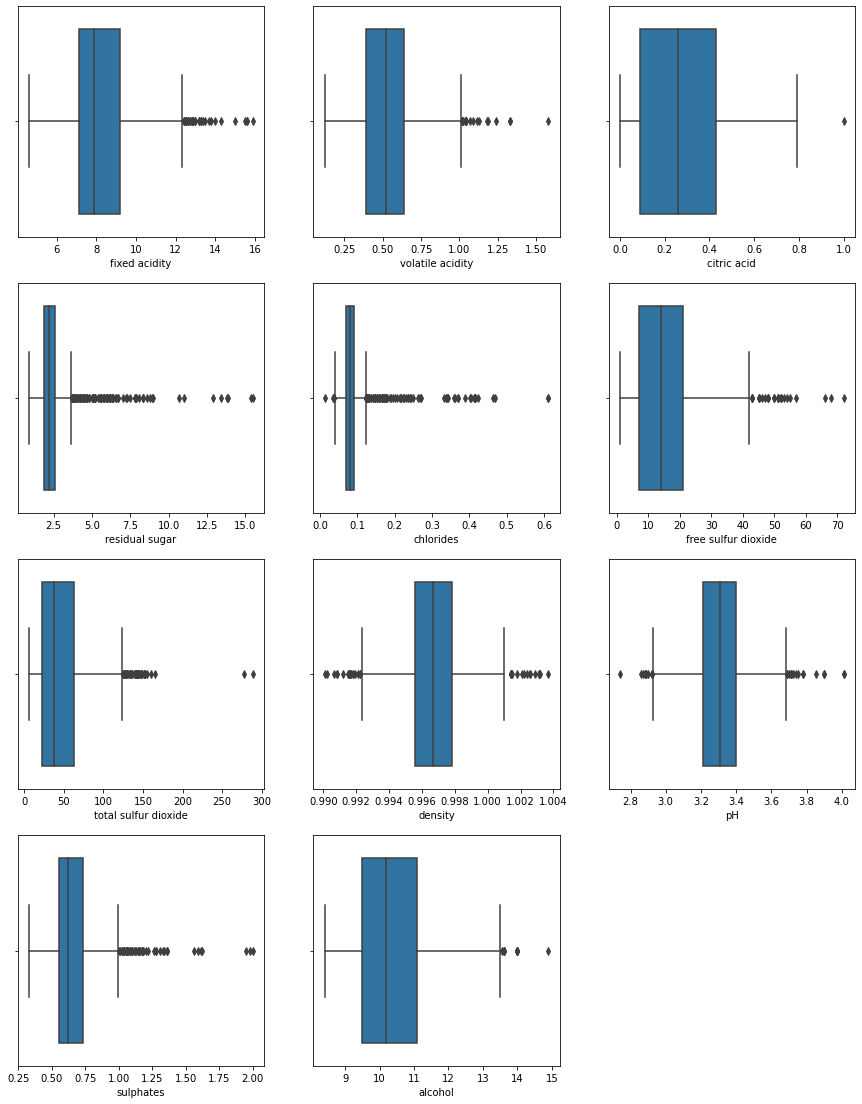

In [623]:
plt.figure(figsize=(15,50))
graph=1

for column in x:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

# 8.Removing skewness and outliers

In [624]:
#Applying zscore only on continous data, so extracting them
x=df.drop(["quality","quality_analysis"],axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [625]:
#Using zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
df_no_outliers=df[(z<3).all(axis=1)]

In [626]:
df_no_outliers=df[(z>-3).all(axis=1)]

In [627]:
df_no_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_analysis
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [628]:
df_no_outliers.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_analysis
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,0.470935
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.499338
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [629]:
df.shape

(1359, 13)

In [630]:
df_no_outliers.shape

(1359, 13)

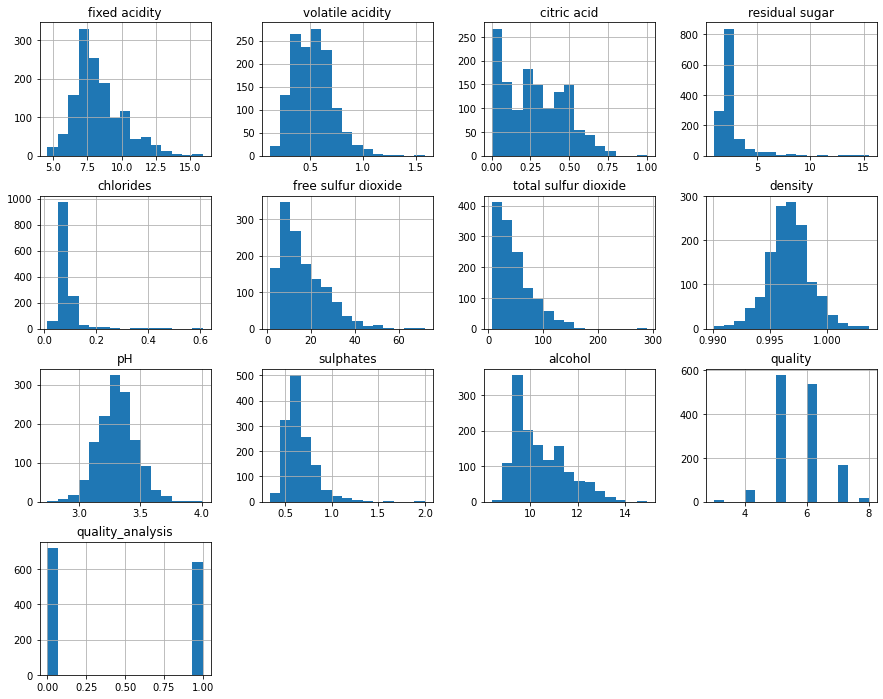

In [631]:
df_no_outliers.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Removed outliers upto 3 standard deviations

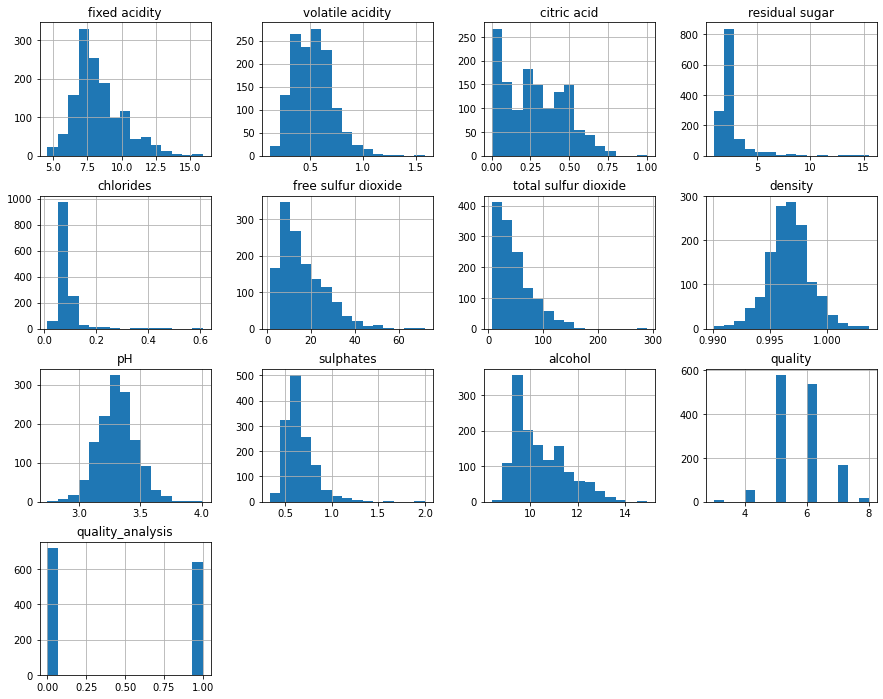

In [632]:
df_no_outliers.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# 9.Train test split

In [633]:
x=df_no_outliers.drop(["quality","quality_analysis"],axis=1)
y=df_no_outliers["quality_analysis"]

In [634]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [635]:
y

0       1
1       1
2       1
3       0
5       1
       ..
1593    0
1594    1
1595    0
1597    1
1598    0
Name: quality_analysis, Length: 1359, dtype: int64

In [636]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [637]:
#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [638]:
y_train.head()

390     0
654     1
895     0
1497    0
1344    1
Name: quality_analysis, dtype: int64

# 10. Finding best random state

In [639]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.7970588235294118 on Random State 95


We found best random_state value as 0.7970588235294118.We will create our train_test split using the random_state(95)

# 11. Testing various models

In [640]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=maxRS)

In [641]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7970588235294118
[[142  38]
 [ 31 129]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       180
           1       0.77      0.81      0.79       160

    accuracy                           0.80       340
   macro avg       0.80      0.80      0.80       340
weighted avg       0.80      0.80      0.80       340



In [642]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6558823529411765
[[126  54]
 [ 63  97]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       180
           1       0.64      0.61      0.62       160

    accuracy                           0.66       340
   macro avg       0.65      0.65      0.65       340
weighted avg       0.66      0.66      0.66       340



In [643]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7647058823529411
[[143  37]
 [ 43 117]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       180
           1       0.76      0.73      0.75       160

    accuracy                           0.76       340
   macro avg       0.76      0.76      0.76       340
weighted avg       0.76      0.76      0.76       340



In [644]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7911764705882353
[[144  36]
 [ 35 125]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       180
           1       0.78      0.78      0.78       160

    accuracy                           0.79       340
   macro avg       0.79      0.79      0.79       340
weighted avg       0.79      0.79      0.79       340



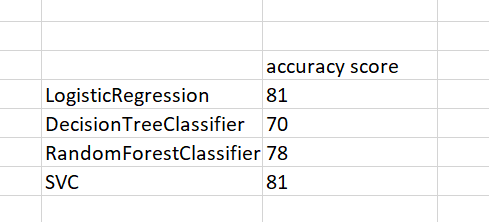

# 12. Finding overfitting

In [645]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7225987627523335


In [646]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

Cross validation score of Decision Tree model : 0.6386965487301932


In [647]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.7211227479921858


In [648]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.6276237247666594


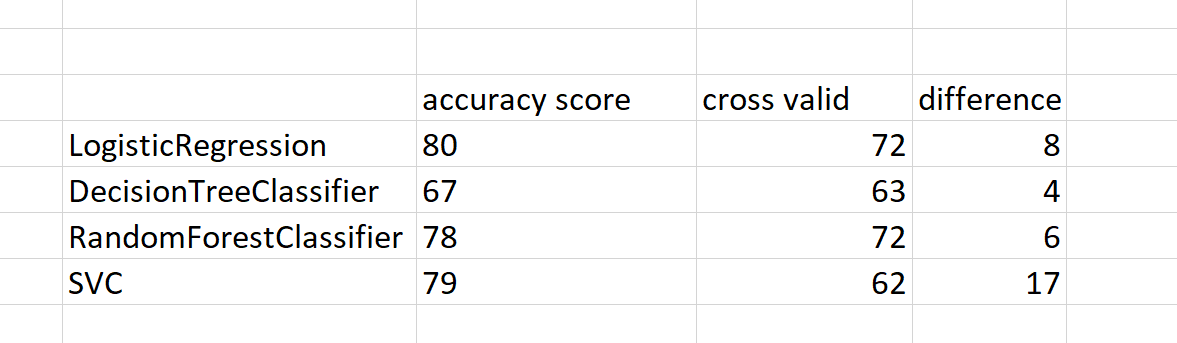

Decision Tree Classifier is the best model among the four

In [649]:
df_no_outliers.to_csv('RedWine.csv', index=False)

# 13.HyperParameter tuning

In [650]:
from sklearn.model_selection import GridSearchCV 


In [651]:
#Decision Tree CLassifier
paramters={'criterion':['gini', 'entropy'],
           'splitter':['best', 'random'],
           'min_samples_split':[2,3,4,5,6,7],
           'min_samples_leaf':[2,3,4,5,6,7,8,9],
           'max_leaf_nodes':[2,3,4,5,10,20,30,40],
}

In [652]:
GCV=GridSearchCV(DecisionTreeClassifier(),paramters,cv=5)

In [653]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [654]:
GCV.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [655]:
mod=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=20,min_samples_leaf=7,min_samples_split=5,splitter='random')

In [656]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

72.05882352941177


Best accuracy was found to be 0.7970588235294118 on Random State 95

# 14.ROC AUC score

In [657]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [658]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [659]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [660]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)

0.7294117647058823

In [661]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.765625

In [662]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7975694444444443

In [663]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7270833333333333

In [664]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.6690972222222222

the AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.

The AUC score shows that Logistic regression is the best classifier among this

# 15.ROC AUC curve

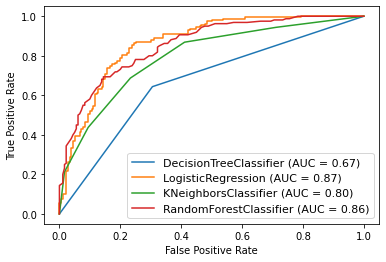

In [665]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':11},loc='lower right')

plt.show()

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Here Largest area is under the Logistic regression, hence the best model is Logistic regression

# 16.GridSearchCV for Logistic regression

In [666]:
from sklearn.model_selection import GridSearchCV 

In [667]:
#Logistic Regression
paramters={'penalty':['l1', 'l2','elasticnet','none'],
           'dual':[True,False],
           'tol':[0.21,0.50,0.75,1,1.25,1.5],
           'C':[2,3,4,5,6,7,8,9],
           'intercept_scaling':[1.2,2.1,3.1,20.2],
}

In [668]:
from sklearn.linear_model import LogisticRegression
GCV=GridSearchCV(LogisticRegression(),paramters,cv=5)

In [669]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [2, 3, 4, 5, 6, 7, 8, 9], 'dual': [True, False],
                         'intercept_scaling': [1.2, 2.1, 3.1, 20.2],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.21, 0.5, 0.75, 1, 1.25, 1.5]})

In [670]:
GCV.best_params_

{'C': 2, 'dual': False, 'intercept_scaling': 1.2, 'penalty': 'l2', 'tol': 1.5}

In [671]:
mod=LogisticRegression(C=2,dual=False,intercept_scaling=1.2,penalty='l2',tol=1.5)

In [672]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

78.82352941176471


# 17.Saving

In [673]:
LogisticRegression_tree_model=LogisticRegression()
LogisticRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LogisticRegression_tree_model,open(filename,'wb'))

# 18.Prediction

In [674]:
#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8]]))

# 19.Adjusted R2

In [675]:
LogisticRegression_tree_model.score(x_train,y_train)

0.7262021589793916

In [676]:
y_pred=LogisticRegression_tree_model.predict(x_test)

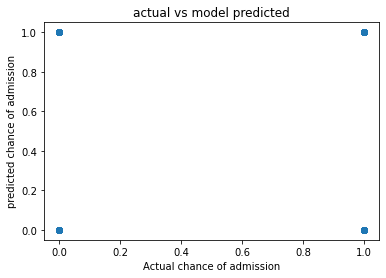

In [677]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# 20.Model evaluation

In [678]:
from sklearn.metrics import mean_squared_error

In [679]:
mean_squared_error(y_test,y_pred)

0.20294117647058824

# 21.Regularisation

In [680]:
from sklearn.linear_model import Lasso,LassoCV

lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.00011423672365476016)

In [681]:
lasso_reg.score(x_test,y_test)

0.3865512932349727